In [3]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data.paths.parquet_paths import REVIEW
from pandas_setup.pandas_setup import get_parquet_pandas

In [4]:
review_df = get_parquet_pandas(str(REVIEW))
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        0 non-null       float64
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 5.7+ MB


In [5]:
review_df['review_id'].is_unique
review_df = review_df.set_index('review_id')

In [6]:
review_df['date'] = pd.to_datetime(review_df['date'])

In [7]:
review_df.describe()

,stars,useful,funny,cool
count,0.0,100000.000000,100000.000000,100000.000000
mean,NaN,1.093340,0.368510,0.449590
std,NaN,2.323317,1.326691,1.415605
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000
75%,NaN,1.000000,0.000000,0.000000
max,NaN,98.000000,75.000000,93.000000


### Variables - helpers

In [8]:
review_id = 'review_id'
user_id = 'user_id'
business_id = 'business_id'
stars = 'stars'
useful = 'useful'
funny = 'funny'
cool = 'cool'
text = 'text'
date = 'date'

In [9]:
review_df.sample(1)

,user_id,business_id,stars,date,text,useful,funny,cool
review_id,,,,,,,,
tM6drHjwgX09HUmTmGqIng,yphnJ8zYbJF7Y3QbtMj91g,ojk9NWd9QTWIhu55EN-hcQ,NaN,2018-03-25,Kind old looking pastry shop! The appearance i...,1,1,2


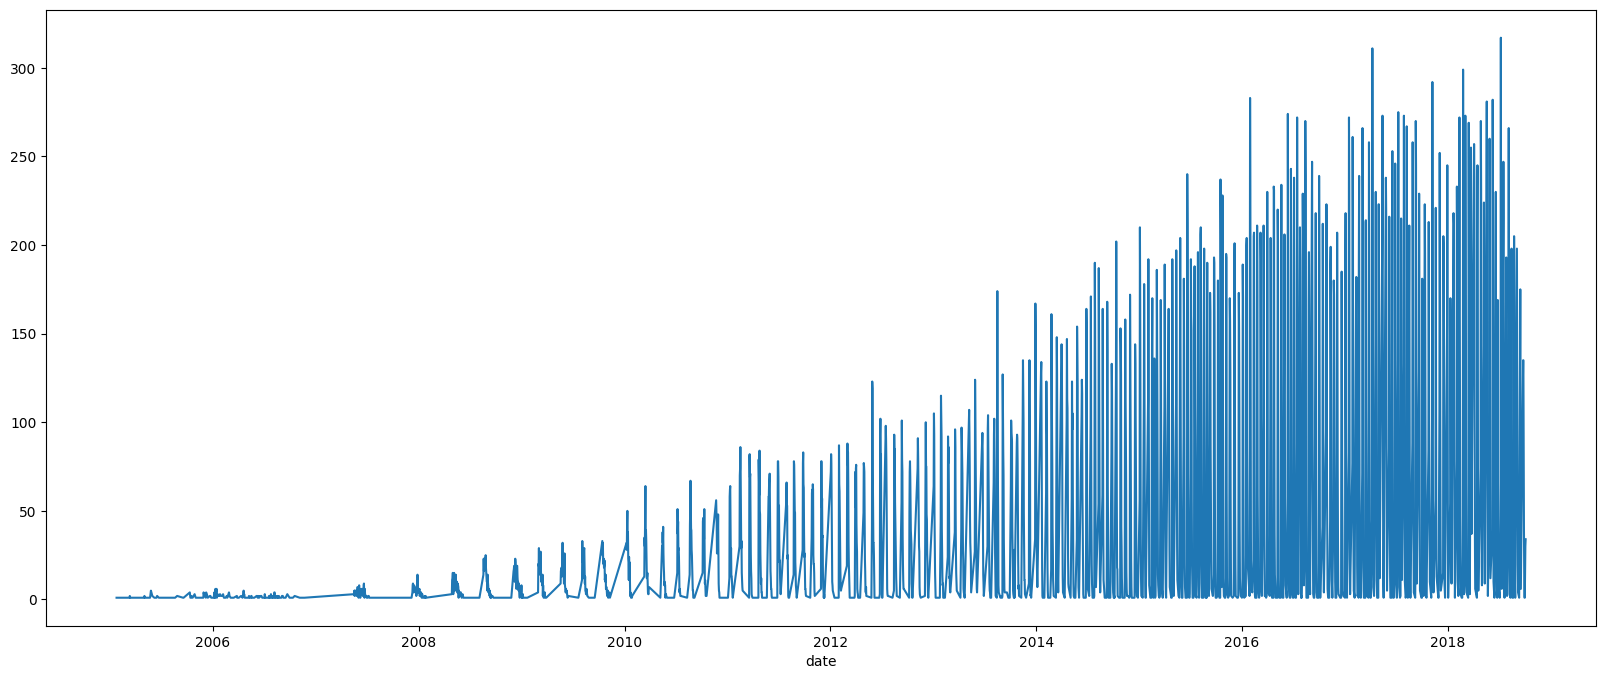

In [10]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=review_df.sort_values(date).groupby(date).size())
plt.show()

In [11]:
review_count_by_date_df = review_df.sort_values(date).groupby(date).size().reset_index(name='review_count')
review_count_by_date_df

,date,review_count
0,2005-01-24,1
1,2005-03-03,1
2,2005-03-04,1
3,2005-03-10,1
4,2005-03-11,1
...,...,...
2081,2018-09-29,13
2082,2018-09-30,1
2083,2018-10-01,1
2084,2018-10-03,30


In [12]:
review_count_by_date_df.shape # (2086, 2)

(2086, 2)

In [27]:
review_count_by_date_df['date_bin'] = pd.cut(review_count_by_date_df['date'], 40)

,date,review_count,date_bin
0,2005-01-24,1,"(2005-01-18 23:58:33.600000, 2005-05-29 00:36:00]"
1,2005-03-03,1,"(2005-01-18 23:58:33.600000, 2005-05-29 00:36:00]"
2,2005-03-04,1,"(2005-01-18 23:58:33.600000, 2005-05-29 00:36:00]"
3,2005-03-10,1,"(2005-01-18 23:58:33.600000, 2005-05-29 00:36:00]"
4,2005-03-11,1,"(2005-01-18 23:58:33.600000, 2005-05-29 00:36:00]"
...,...,...,...
2081,2018-09-29,13,"(2018-05-31 23:24:00, 2018-10-04]"
2082,2018-09-30,1,"(2018-05-31 23:24:00, 2018-10-04]"
2083,2018-10-01,1,"(2018-05-31 23:24:00, 2018-10-04]"
2084,2018-10-03,30,"(2018-05-31 23:24:00, 2018-10-04]"


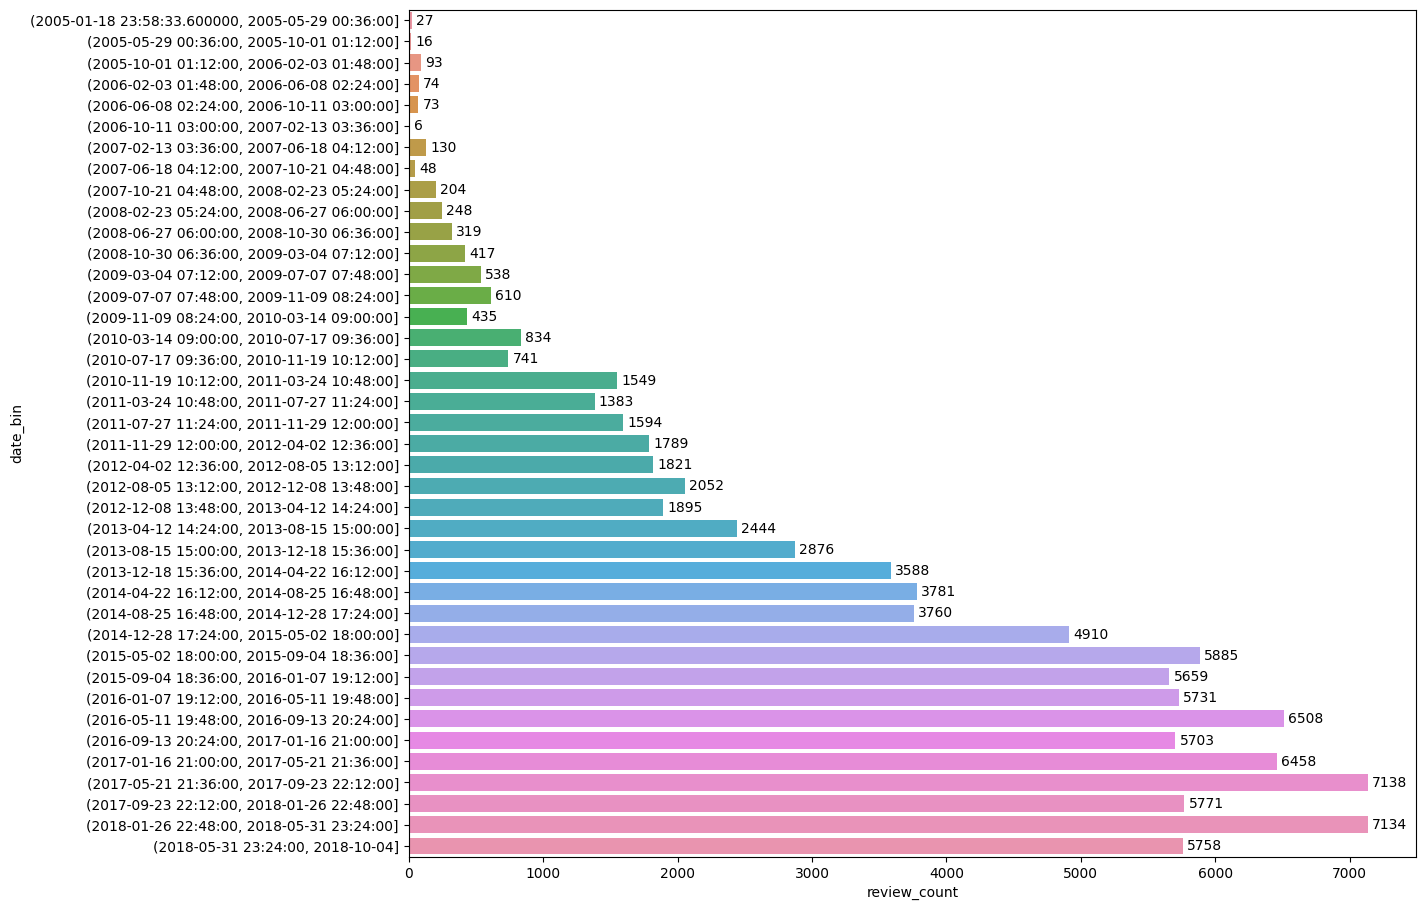

In [92]:
x = review_count_by_date_df['date_bin'].unique()
y = review_count_by_date_df.groupby('date_bin')['review_count'].sum().to_frame().reset_index()

plt.figure(figsize=(13, 11))
ax = sns.barplot(data=y, x='review_count', y='date_bin')
ax.bar_label(ax.containers[0], padding=3)
plt.show()